**1 ) TITLE OF THIS PROJECT**

  "**Optimizing Bank Marketing Campaigns**

    NAME : TONCY JOSEPH

    ORGANIZATION : ENTRI ELEVATE**

    DATE : 20/9/2024




**2)  Overview of Problem Statement**

    In the banking sector, direct marketing campaignS are a key method for

    promoting financial products, particularly term deposits. These campaigns

    rely heavily on phone calls to engage with potential customers. However,
     
    predicting which clients will subscribe to a term deposit after a
      
    marketing campaign remains a significant challenge. Customer decisions
      
    are influenced by a variety of factors, including their demographics,
       
    financial circumstances, and past interactions with the bank.

**3 ) Objective**


    To address this challenge, this project aims to develop a predictive
    
    machine learning model using data from a Portuguese banking institution

    The dataset, collected between May 2008 and November 2010, contains
     
    detailed information from various direct marketing campaigns. It includes
     
    attributes such as the customer’s age, job, marital status, education
      
    level, and financial history, as well as details about the marketing
      
    efforts, such as the number and outcome of previous contacts.

    With a dataset that encompasses over 41,000 observations and 20 features,
    
    this project will focus on identifying patterns and trends to predict
     
    whether a customer will subscribe to a term deposit. By leveraging machine
     
    learning algorithms, the goal is to improve the bank's ability to target
     
    potential customers, optimize marketing resources, and increase campaign
      
    success rates.

**4 )  Data Description**

    Source

        UCI Machine Learning Repository - Bank Marketing Dataset

        [https://archive.ics.uci.edu/dataset/222/bank+marketing]

**Features**

    bank client data

    1 - age (numeric)

    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")

    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

    4 - education (categorical: "unknown","secondary","primary","tertiary")

    5 - default: has credit in default? (binary: "yes","no")

    6 - balance: average yearly balance, in euros (numeric)

    7 - housing: has housing loan? (binary: "yes","no")

    8 - loan: has personal loan? (binary: "yes","no")

    # related with the last contact of the current campaign:

    9 - contact: contact communication type (categorical: "unknown","telephone",
    "cellular")

    10 - day: last contact day of the month (numeric)

    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

    12 - duration: last contact duration, in seconds (numeric)

    # other attributes:

    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

    15 - previous: number of contacts performed before this campaign and for this client (numeric)
    
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

    Output variable (desired target):
    17 - y - has the client subscribed a term deposit? (binary: "yes","no")



**Dataset Files**

    bank.zip
    bank-additional.zip

**Data Collection**

**importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### **loading dataset**

In [3]:
df = pd.read_csv("/content/bank-full.csv", sep=';')


### **printing first 10 rows of the dataseT**

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


    this dataset helps analyze the success of bank marketing campaigns and
    
    explore patterns in customer behavior, which can be leveraged for decision-making in future campaigns.

**Rename the 'y' column to 'subscription**

In [6]:
df.rename(columns={'y': 'subscription'}, inplace=True)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscription'],
      dtype='object')

**droping** **2** **columns**

In [8]:

columns_to_remove = ['pdays', 'previous']

df = df.drop(columns=columns_to_remove)

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no


**Data** **Preprocessing**

**printing shape&size of the dataset**

In [10]:
df.shape

(45211, 15)

In [11]:
df.size

678165

**data types of each column**

In [12]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


**observation**

    int64: Columns like age, balance,day, duration,campaign,pdays,previous
    hold numerical data, specifically integers.

    object: Columns like job, marital, education,default,housing,loan,contact,
    
    month,poutcome, hold categorical or textual data (strings).

In [13]:
# Impute missing values
for column in df.select_dtypes(include=['float64', 'int64']).columns:
     df[column].fillna(df[column].mean(), inplace=True)

**summary statistics for the numerical columns**

In [14]:
df.describe()

,age,balance,day,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841
std,10.618762,3044.765829,8.322476,257.527812,3.098021
min,18.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  poutcome      45211 non-null  object
 14  subscription  45211 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


**check null values**

In [16]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


 **Find** **Features** **with** **One** **Value**

In [17]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
poutcome 4
subscription 2


age (77 unique values)

    age column has a wide range of age values, making it a continuous variable.

job (12 unique values)

    This column represents different job types. It’s a categorical variable with 12 distinct job categories.

marital (3 unique values)

    This column has three marital status categories (e.g., single, married, divorced).


education (4 unique values)

    Represents different education levels with four distinct categories.


default (2 unique values)

    This is a binary categorical variable (e.g., whether a client has credit in default or not).

balance (7168 unique values)

    This is a continuous variable with a broad range of values, likely representing the client’s account balance.


housing (2 unique values)

    A binary categorical variable (e.g., whether the client has a housing loan or not).

loan (2 unique values)

    Another binary categorical variable (e.g., whether the client has a personal loan or not).


contact (3 unique values)

    Represents the type of communication used for contact (e.g., cellular, telephone).


day (31 unique values)

    Likely represents the day of the month for some activity, so it has 31 possible values.


month (12 unique values)

    Represents months of the year, with 12 possible values.


duration (1573 unique values)

    This is a continuous variable, probably representing the duration of a contact or call, with a large range of values.


campaign (48 unique values)

    Represents the number of contacts performed during this campaign, so it has many unique values.

pdays (559 unique values)

    Represents the number of days since the client was last contacted from a previous campaign. It has a large number of unique values.

previous (41 unique values)

    Represents the number of contacts performed before this campaign. It’s a variable with many possible values.

poutcome (4 unique values)

    Represents the outcome of a previous marketing campaign with four distinct categories.

subscription (2 unique values)  

    This is the target variable with two categories (e.g., whether the client subscribed to a term deposit or not).

**EDA**

**printing categorical columns**

In [18]:
categorical = [var for var in df.columns if df[var].dtype == "O"]
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscription']

**print** **few** **rows** **of** **the** **categorical** **columns**

In [19]:
# Define the categorical columns
categorical_columns = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'poutcome', 'subscription'
]

df[categorical_columns].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscription
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


**Plotting all categorical variables with different colors**

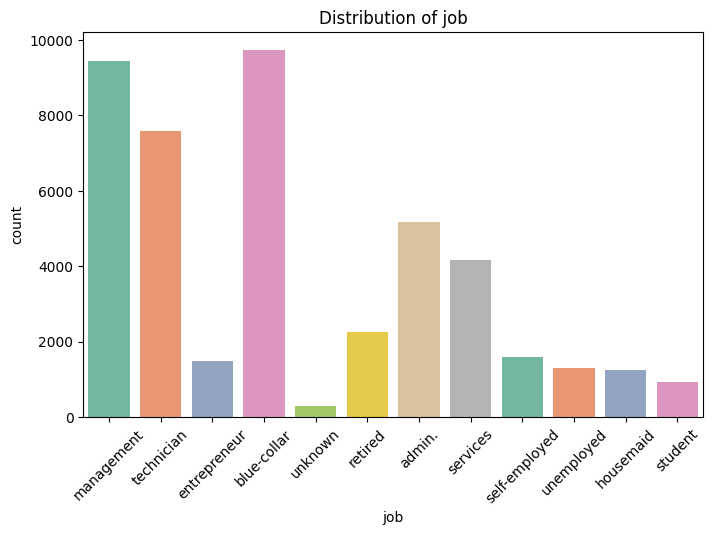

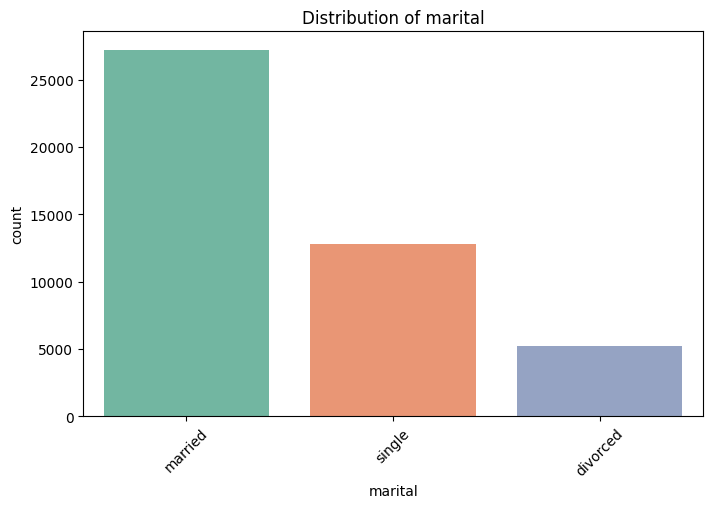

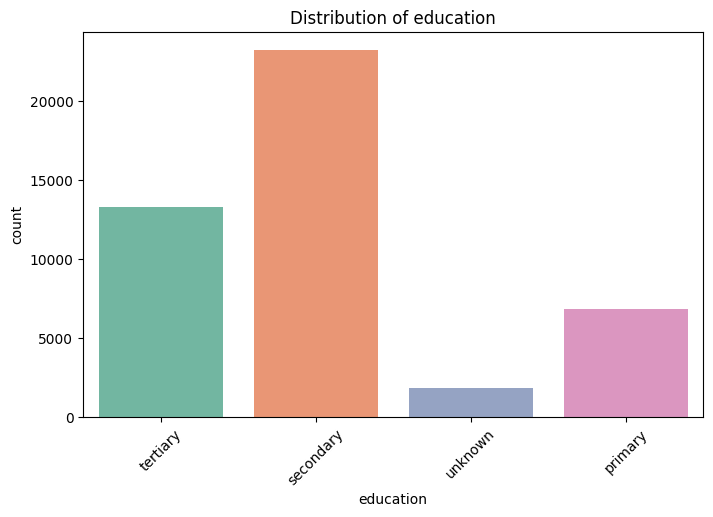

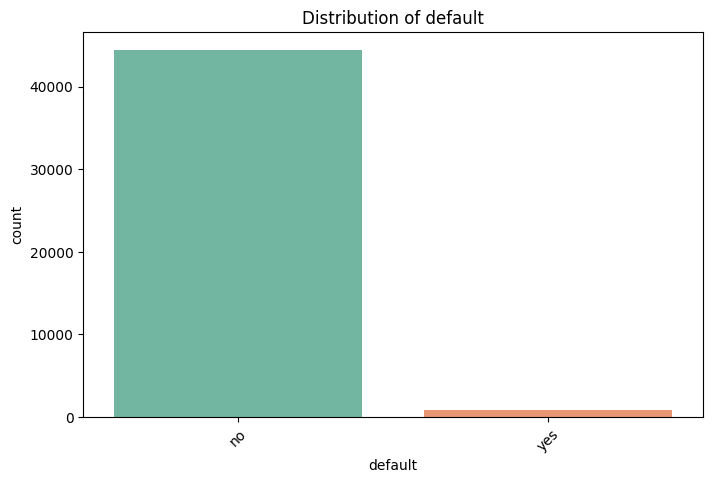

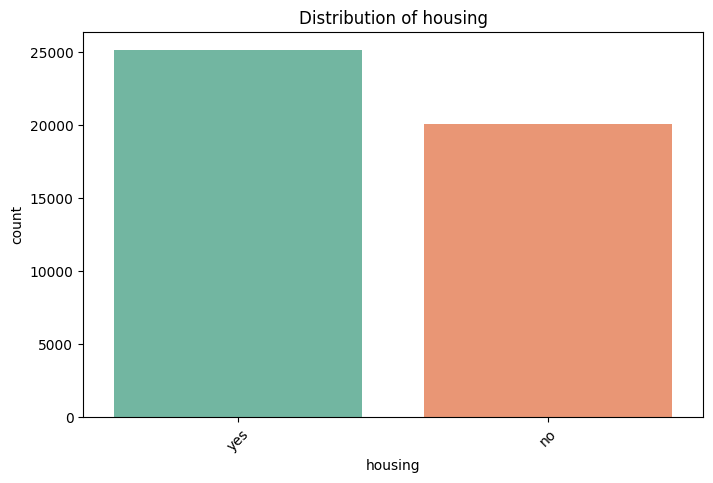

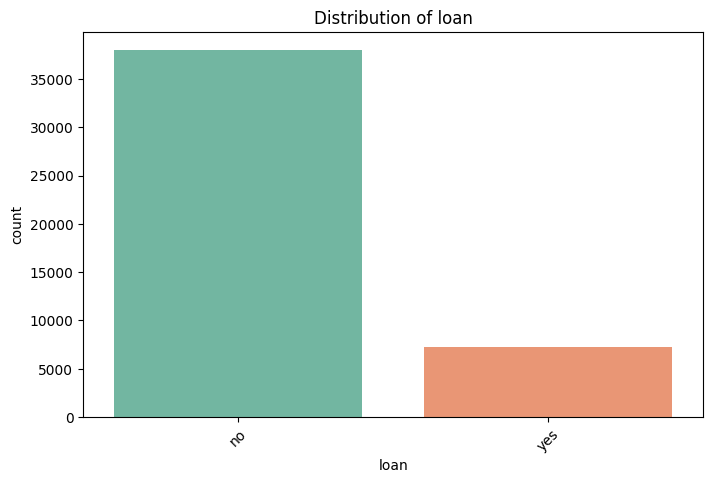

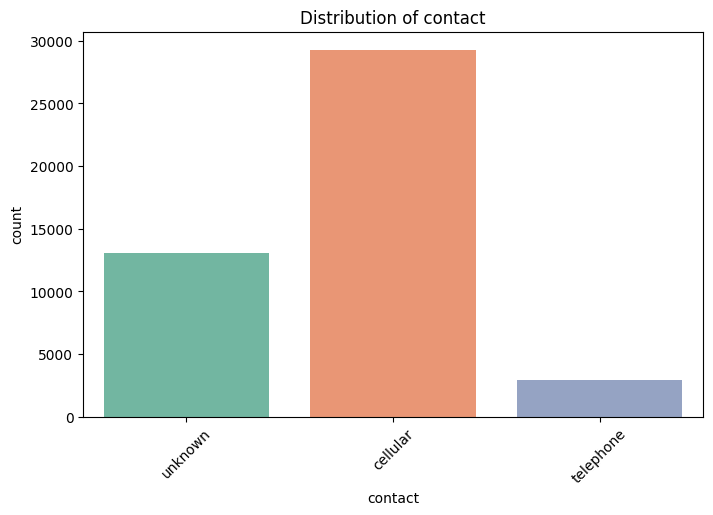

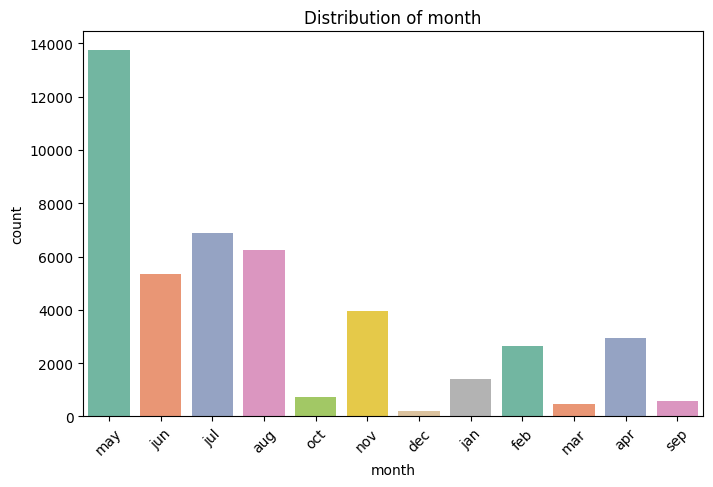

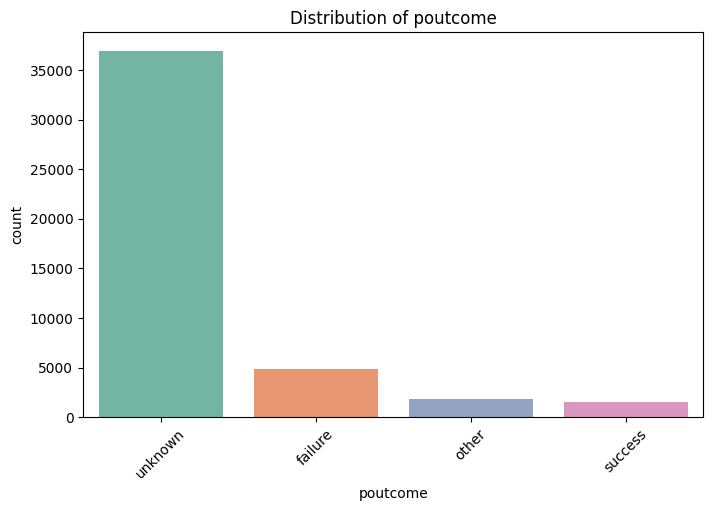

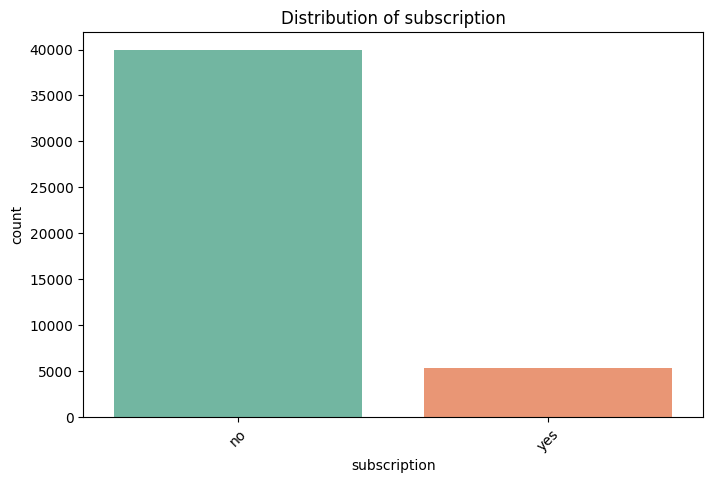

In [20]:
# Import seaborn's color palette
palette = sns.color_palette("Set2")

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette=palette)  # Apply the color palette
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


**Observations**

  job (Type of Job):

    likely observed that the majority of clients fall into job categories such
   
    as "blue-collar," "management," and "technician." Job types like "student,"
    
    "housemaid," and "unemployed" may be underrepresented.


  Insight:


    This suggests that the bank's marketing campaign targets people in
    
    professional or blue-collar jobs more than students or retired individuals.
    
    Job category imbalance may also influence the model, so this could be
    
    relevant for feature engineering.


   Marital Status

    Most clients are "married," followed by "single" and "divorced"
    (which includes widowed individuals).

   Insight:
   
    Married individuals might be more inclined to make long-term
    
    financial commitments, such as subscribing to a term deposit, which could
    
    be a factor when modeling the likelihood of a subscription. A relatively
    
    small number of "divorced" individuals might suggest less engagement in
    
    term deposit products

    .
  Education Level

    Clients with "university.degree" and "high.school" education are likely the
    
    majority, while fewer clients have "basic.4y" or "illiterate" education.


 Insight

    A higher level of education might correlate with better financial literacy,
    
    potentially influencing the likelihood of subscribing to a term deposit.
     
    A strong skew towards university-educated clients suggests a more financially aware customer base.


  default (Has Credit in Default)

    The vast majority of clients likely have no credit in default ("no"), while
    
    only a small proportion has credit in default ("yes").

    Insight: Since most clients do not have credit in default, this feature may
    
    not be very predictive in distinguishing between those who subscribe to
    
    term deposits. However, defaulted clients may be risk-averse and less likely to subscribe

    
  housing (Has Housing Loan):

    Distribution Observation: A large proportion of clients likely have a
    
    housing loan ("yes"), with fewer clients not having one ("no").

    Insight: Housing loans may indicate more financially committed clients, but
    
    it could also mean they are less likely to invest in additional financial
    
    products, such as term deposits, due to existing financial obligations


   loan (Has Personal Loan):

    Similar to housing, the majority of clients might not have a personal loan
    
    ("no"), and only a small portion has one ("yes")

  Insight:

    Clients without personal loans might have more financial flexibility,
    
    making them more inclined to subscribe to a term deposit. Those with
    
    personal loans could be more risk-averse


  contact (Contact Communication Type):

    Distribution Observation: Most clients are likely contacted via "cellular,"
    
    with fewer contacted by "telephone."

  Insight:

    Cellular contacts might reflect modern communication preferences and could
    
    suggest that clients contacted via mobile may have a higher engagement
    
    level. A smaller share of clients contacted via telephone could imply lower response rates from these customers


  month (Last Contact Month)

    Certain months may have a higher frequency of contacts (e.g., "may" or
    
    "august"), while other months (like "december" or "november") may have fewer.

  Insight:
    
    Seasonality could affect customer engagement with marketing campaigns. For
    
    instance, clients contacted in certain months might be more likely to
    
    subscribe to a term deposit, perhaps due to seasonal financial planning or bonuses.


  poutcome (Outcome of Previous Marketing Campaign):

    Most clients probably fall under the "unknown" category, meaning they were
    
    not part of previous campaigns. "Failure" could be the next most common, with "success" being less frequent.

  Insight:
    
    Clients with a previous "success" outcome may be more likely to subscribe
    
    again, while those with "failure" or "unknown" outcomes might be less engaged.


  subscription (Target Variable – Subscribed to Term Deposit)


    observe an imbalance in the target variable, with more clients having "no"
    
    as the outcome (not subscribed) than "yes" (subscribed).
    

   Insight:
    
    The class imbalance in the target variable indicates that the dataset is
    
    skewed towards clients who did not subscribe to a term deposit.

    
    
    




**Pie** **Diagram** **subscripition** **proportion**

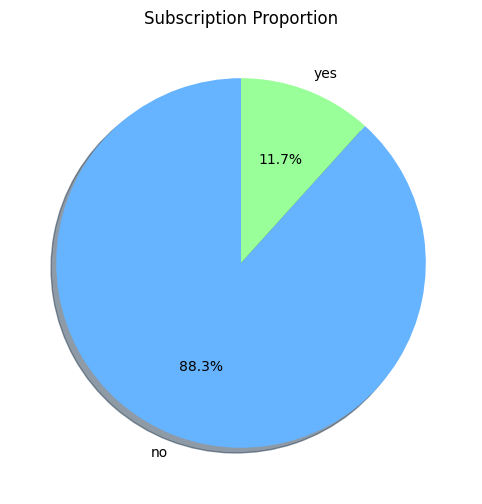

In [21]:
      plt.figure(figsize=(8, 6))
df['subscription'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90, shadow=True)
plt.title('Subscription Proportion')
plt.ylabel('')
plt.show()

**find** **the** **relationship** **between** **categorical** **features** **and** **target** **variable**(subscription)

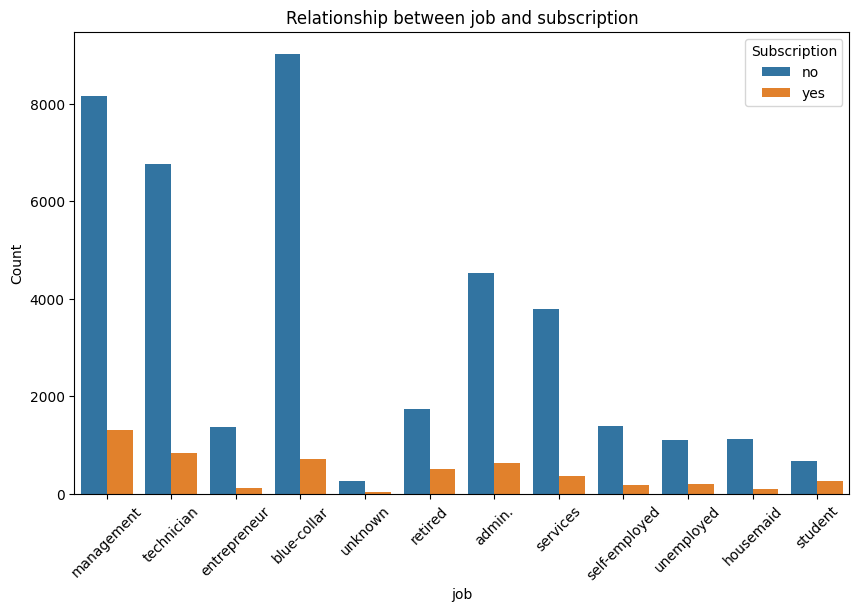

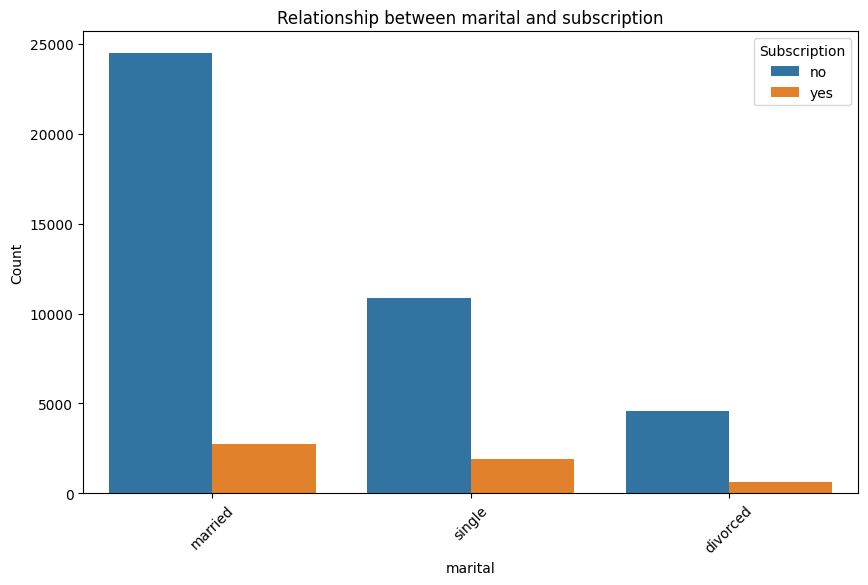

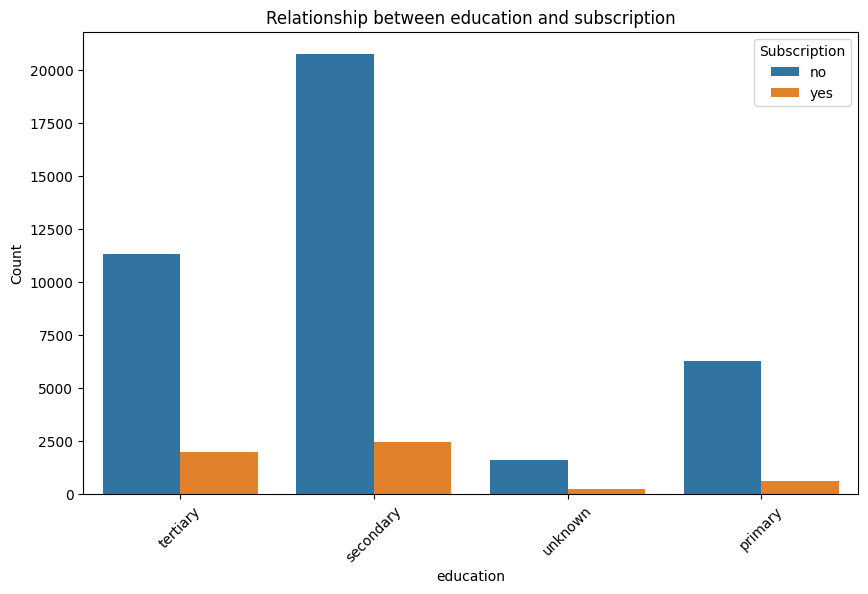

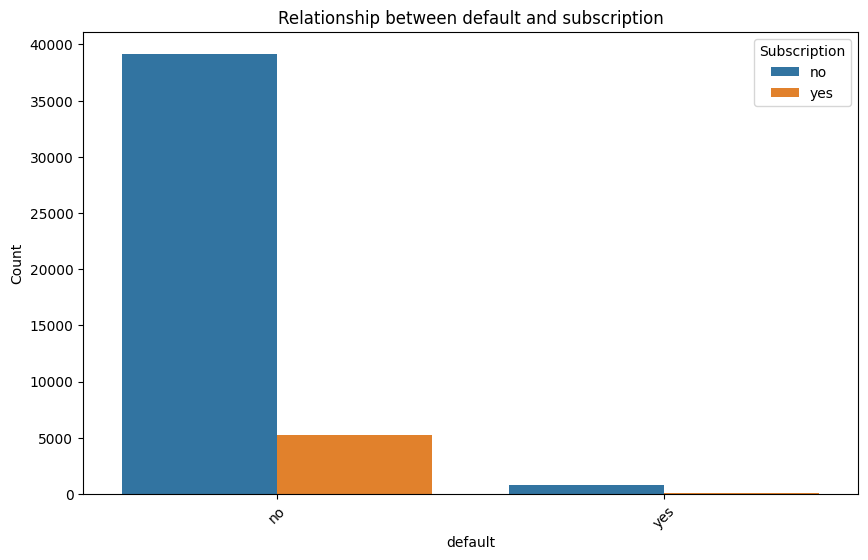

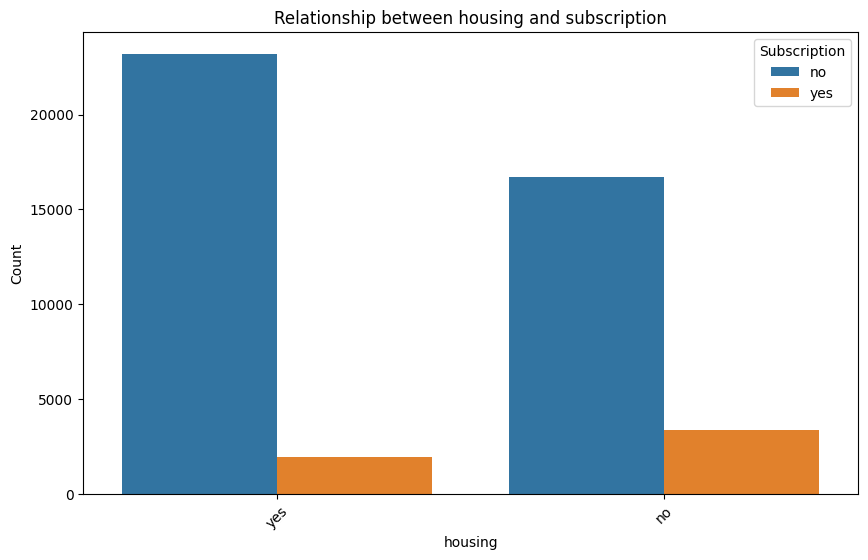

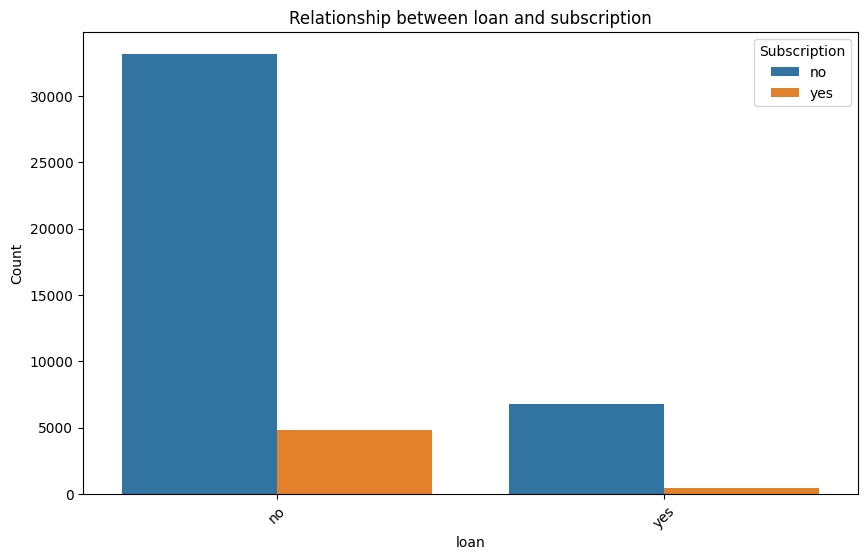

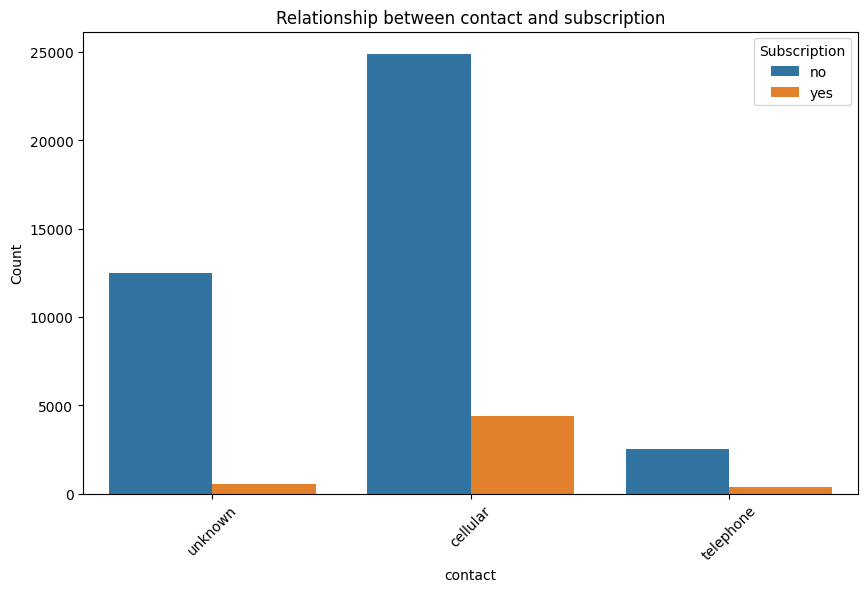

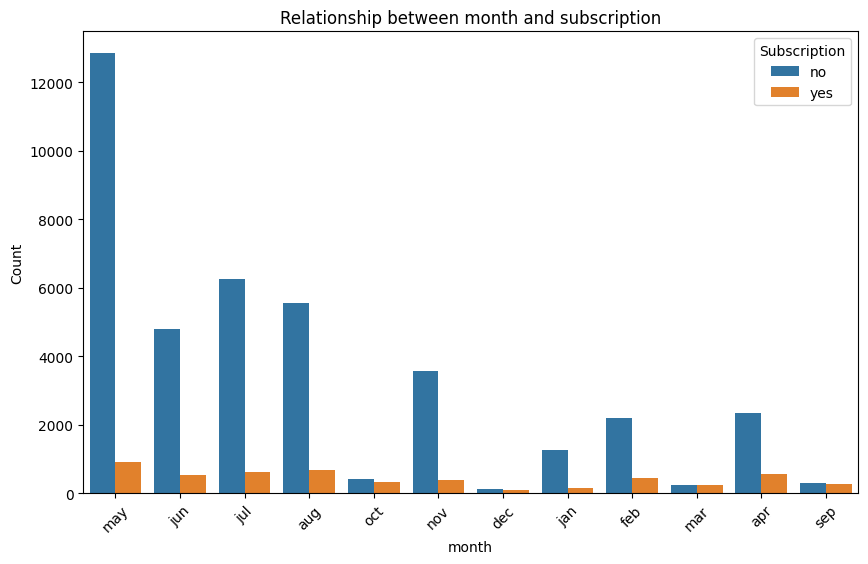

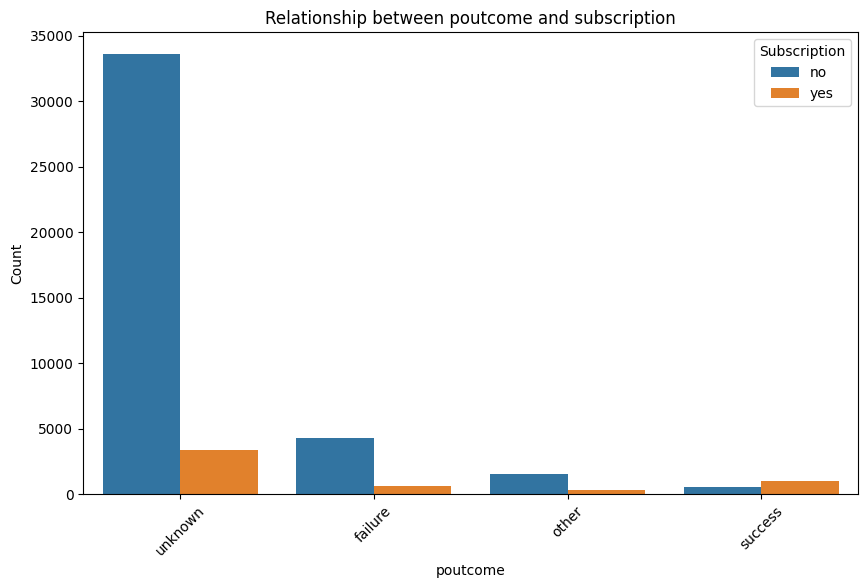

In [22]:


# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Iterate over each categorical feature and create a count plot split by the target variable
for categorical_feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_feature, hue='subscription', data=df)
    plt.title(f'Relationship between {categorical_feature} and subscription')
    plt.xticks(rotation=45)
    plt.xlabel(categorical_feature)
    plt.ylabel('Count')
    plt.legend(title='Subscription')
    plt.show()


**Check** **counts** **of** **target** **variable** **split** **by** **each** **categorical** **feature**

In [23]:

for categorical_feature in categorical_features:
    print(f"Counts of target variable split by {categorical_feature}:")
    counts = df.groupby([categorical_feature, 'subscription']).size().unstack().fillna(0)
    print(counts)
    print()

Counts of target variable split by job:
subscription     no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

Counts of target variable split by marital:
subscription     no   yes
marital                  
divorced       4585   622
married       24459  2755
single        10878  1912

Counts of target variable split by education:
subscription     no   yes
education                
primary        6260   591
secondary     20752  2450
tertiary      11305  1996
unknown        1605   252

Counts of target variable split by default:
subscription     no   yes
default                  
no            39159  5237
yes             763    52

Counts of target variable split by housing:
subscription     no   ye

 **Explore** **the** **Numerical** **Features**

In [24]:

numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


**Plotting** **histograms** **for** **numerical** **variables**

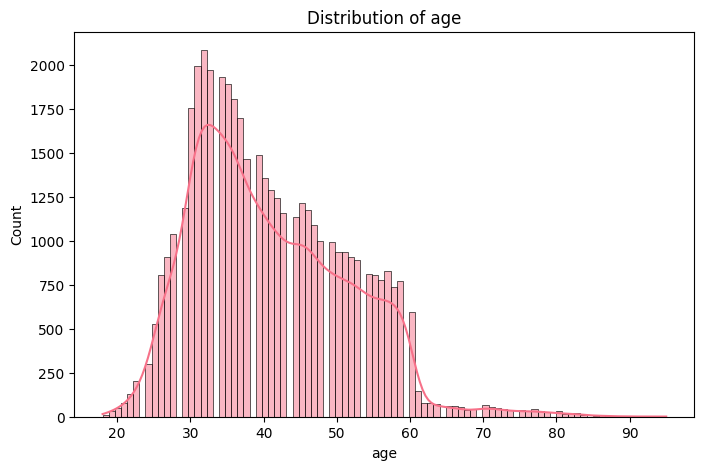

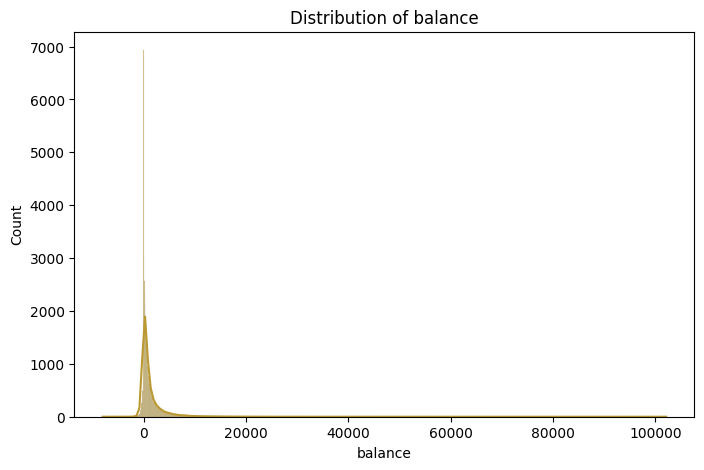

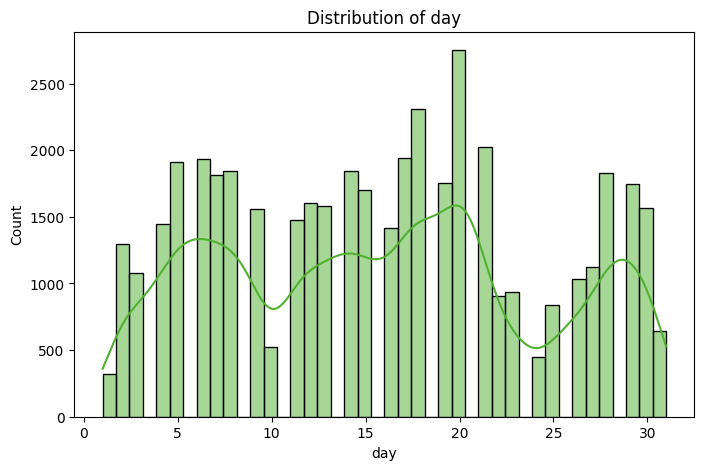

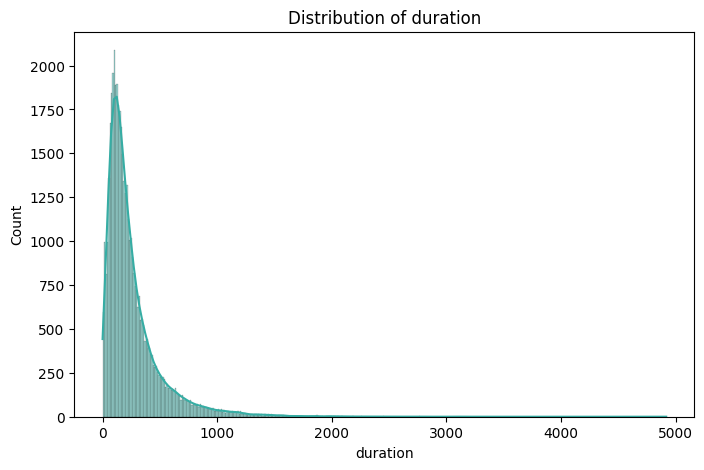

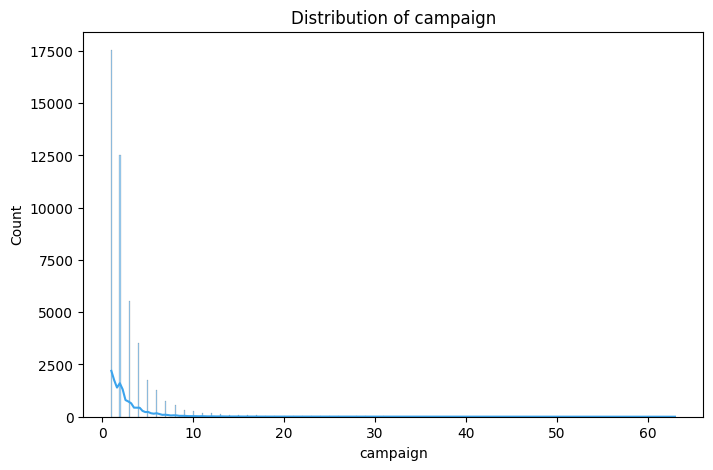

In [25]:
# Using a Seaborn color palette

palette = sns.color_palette("husl")

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numerical_cols):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color=palette[i % len(palette)])
    plt.title(f'Distribution of {col}')
    plt.show()

**age**

    The age distribution might show a bell curve, with most clients
    
    concentrated between 30 and 60 years old. There could be fewer younger
    
    clients (below 20) and older clients (above 70).


**insight**

    This suggests the target audience for the bank's marketing campaign is
    
    middle-aged individuals, which is typical for financial products like term
     
    deposits. Understanding how different age groups respond to the campaign
      
    might help optimize the model.


**balance** (Average Yearly Balance in Euros)

    The balance distribution might be right-skewed, with a long tail of
     
    clients having very high balances. Most clients likely have a balance
      
    closer to 0, while fewer clients have large savings.



**Insight**:

    This skewed distribution indicates that the majority of clients maintain
    
    relatively modest balances, and only a small subset of wealthy clients has
     
    much higher balances. Wealthier clients might be more likely to invest in
      
    term deposits, but the model will need to account for this skew.


**day** (Day of the Month for the Last Contact)

    observe an approximately uniform distribution, as clients are contacted
    
    fairly evenly throughout the month, with no specific day standing out.


**Insight**:

    This suggests that the bank's marketing efforts were distributed fairly
    
    evenly across the month, with no specific day having a significant effect on customer engagement.


**campaign** (Number of Contacts Performed During the Campaign):

    The distribution of the campaign variable might be highly skewed, with most
    
    clients having only 1 or 2 contacts, and fewer clients being contacted
     
    more than 5 times.


**Insight**:

    A small number of contacts is typical for a marketing campaign, and clients
    
    who are contacted more frequently might have already shown interest.
     
    However, repeated contacts may indicate lower responsiveness or even
     
    annoyance, which could affect the likelihood of a term deposit
     
    subscription.


**pdays** (Number of Days Since Last Contact from a Previous Campaign)

    This variable could show a sharp peak at -1, indicating that many clients
    
    have not been previously contacted. For other clients, the distribution may
    
    be more spread out with a long tail.




**Insight**

    The peak at -1 highlights that most clients were new to the campaign and
    
    were not previously contacted. This could have a significant impact on
    
    their likelihood of subscribing to the term deposit, as first-time contact
    
    may have different results than follow-ups.


**previous** (Number of Contacts from Previous Campaigns)


    The previous variable is likely skewed towards 0, with most clients not
    
    being contacted in previous campaigns. A small number of clients may have
   
    multiple previous contacts.




**Insight**

    The fact that most clients were not part of previous campaigns suggests
    
    that the marketing campaign is reaching many new clients. Clients with more
   
    previous contacts could show different behavior in terms of subscribing.


**duration** (Last Contact Duration in Seconds):

    
    The duration variable is typically right-skewed, with many short calls and
    
    a few longer ones. Shorter calls might dominate the distribution, with a
    
    long tail for the longer durations.


**Insight**

    Call duration is a critical variable, as longer calls likely indicate more
    
    engagement and a higher chance of subscription. The large number of short
     
    calls may include uninterested or unavailable clients, while longer calls could correlate with successful outcomes.






     
   


    




 **boxplots** **for** **each** **numerical** **feature** **against** **subscription**

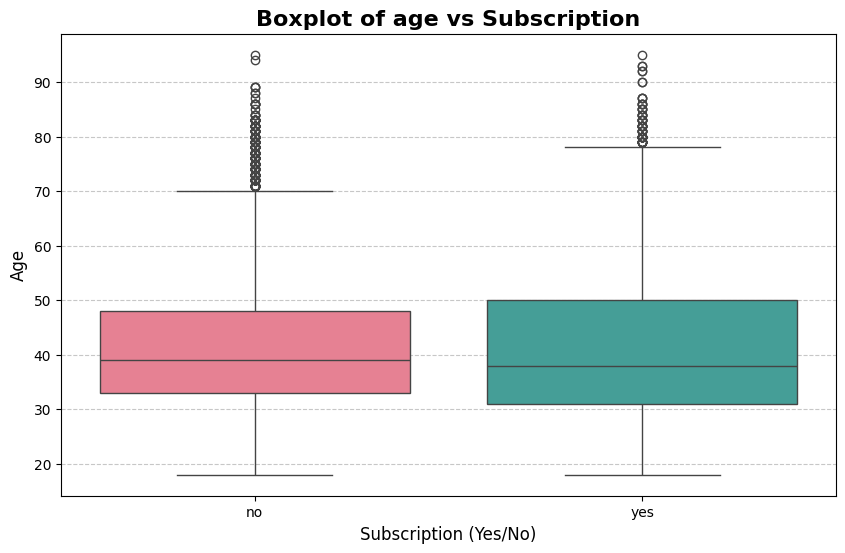

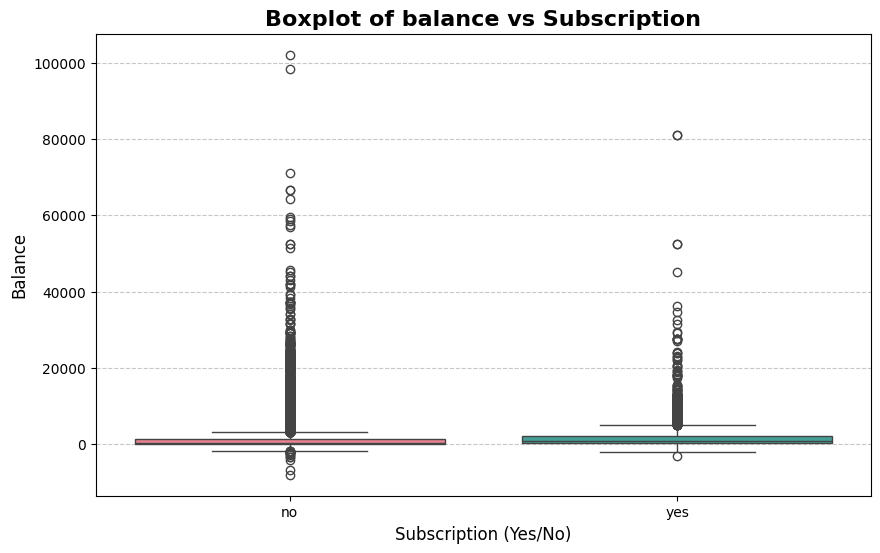

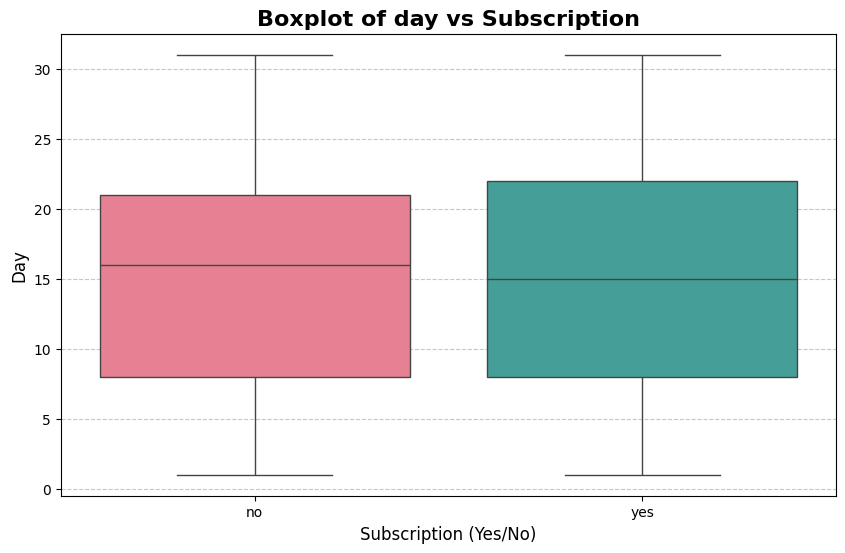

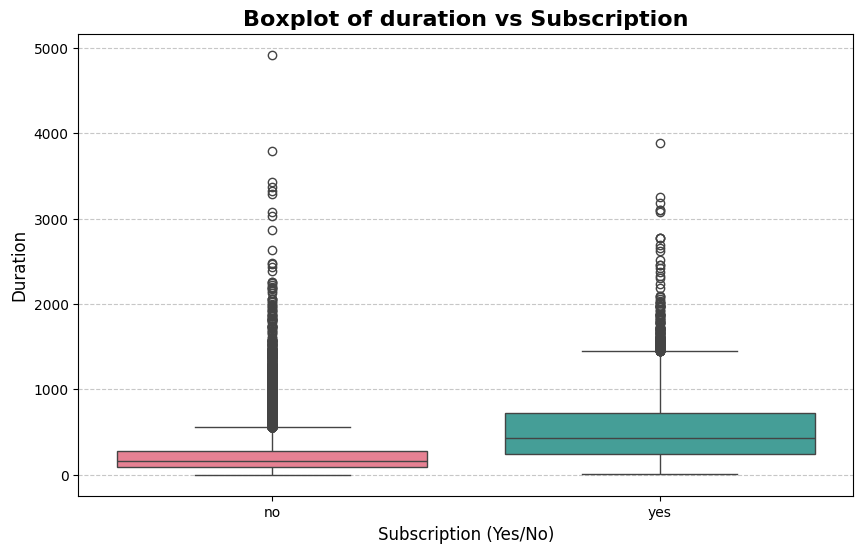

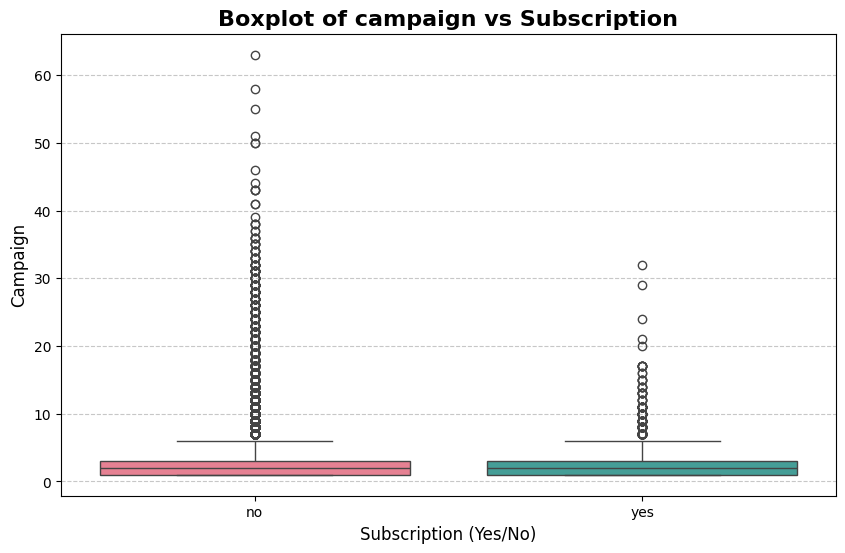

In [26]:




numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign']

# Plot boxplots for each numerical feature against subscription
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='subscription', y=col, data=df, palette='husl')
    plt.title(f'Boxplot of {col} vs Subscription', fontsize=16, fontweight='bold')
    plt.xlabel('Subscription (Yes/No)', fontsize=12)
    plt.ylabel(col.capitalize(), fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


**Data** **Cleaning**

**Handling** **Outliers** "Identifying outliers helps in cleaning the data for better **mode**

In [27]:
# Outlier treatment function
def treat_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return df

In [28]:
# List of columns to treat for outliers
columns_to_treat = ['age', 'balance', 'day', 'duration', 'campaign']

# Assuming 'treat_outliers' is a function that handles outlier treatment
for column in columns_to_treat:
    if column in df.columns:
        df = treat_outliers(df, column)

# Display the treated DataFrame
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscription
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,unknown,no


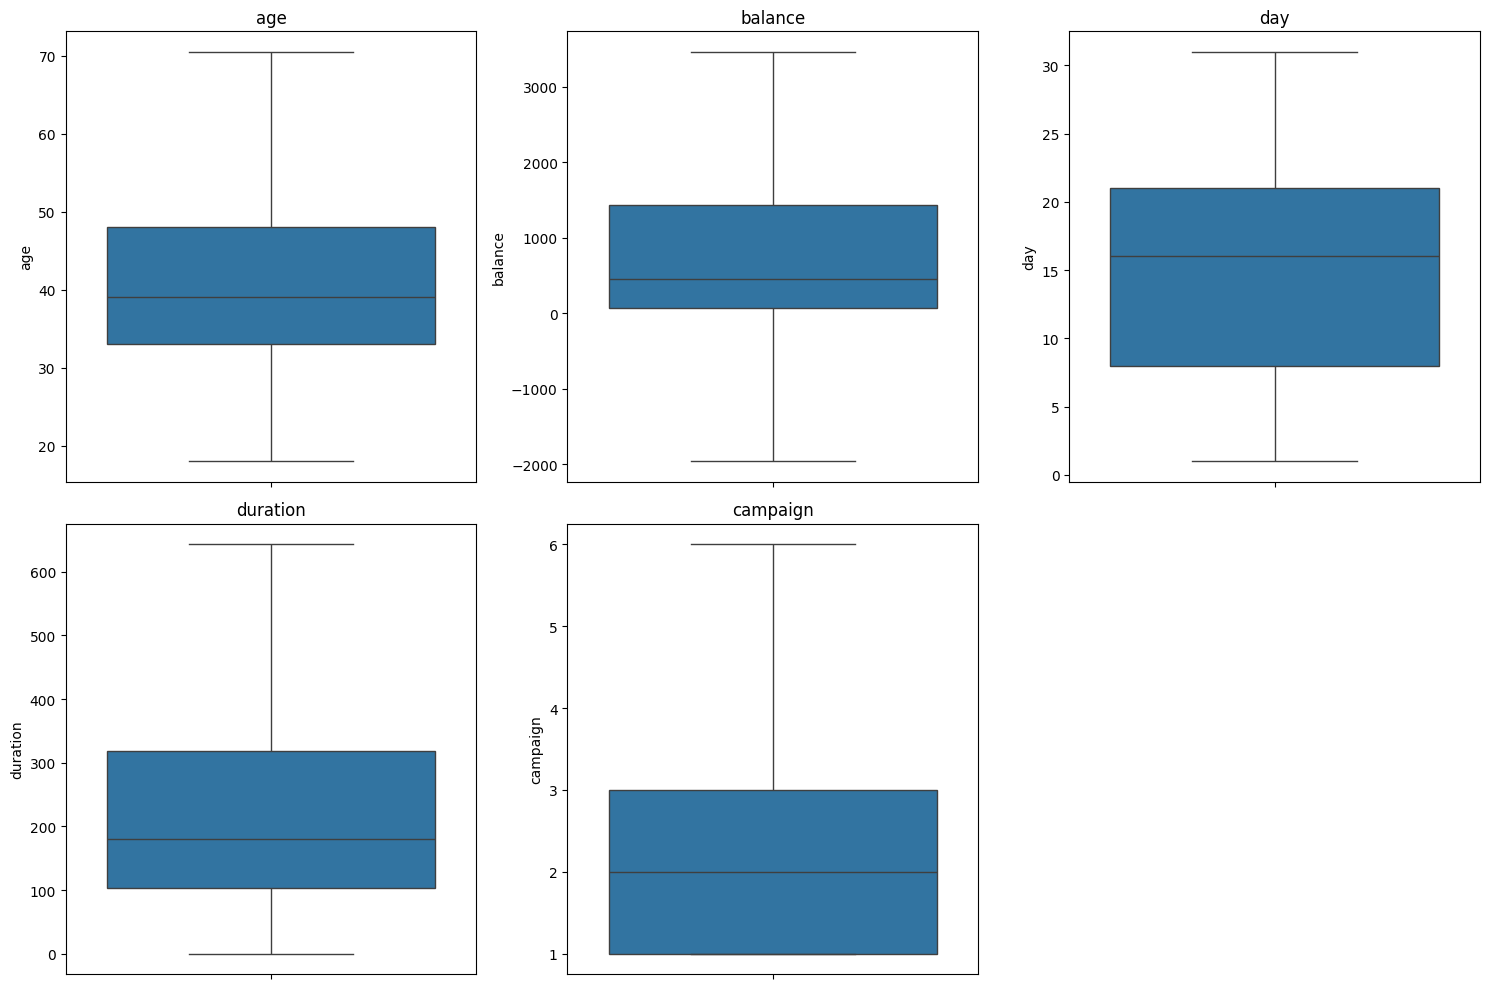

In [29]:
# Select numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for the subplots
ncols = 3    # Number of columns in the grid
nrows = (len(numerical_cols) + ncols - 1) // ncols  # Calculate rows needed to fit all columns

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Optionally remove x-axis labels for cleaner look

# Remove any empty subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


**Address** **skewed** **data**

In [30]:


columns_to_transform = ['age', 'balance', 'day', 'duration', 'campaign']
df[columns_to_transform] = df[columns_to_transform].clip(lower=0)          # Replace negatives with 0

# Apply log transformation

df[columns_to_transform] = np.log1p(df[columns_to_transform])


print(df[columns_to_transform].head())


        age   balance       day  duration  campaign
0  4.077537  7.670429  1.791759  5.568345  0.693147
1  3.806662  3.401197  1.791759  5.023881  0.693147
2  3.526361  1.098612  1.791759  4.343805  0.693147
3  3.871201  7.317876  1.791759  4.532599  0.693147
4  3.526361  0.693147  1.791759  5.293305  0.693147


**categorical** **data** **converterd** **into** **numerical** **data** **using** **labelencoder**

**feature engineering**

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['subscription'] = le.fit_transform(df['subscription'])



**printing** **the** **first** **10** **rows** **ater** **encodering**

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscription
0,4.077537,4,1,2,0,7.670429,1,0,2,1.791759,8,5.568345,0.693147,3,0
1,3.806662,9,2,1,0,3.401197,1,0,2,1.791759,8,5.023881,0.693147,3,0
2,3.526361,2,1,1,0,1.098612,1,1,2,1.791759,8,4.343805,0.693147,3,0
3,3.871201,1,1,3,0,7.317876,1,0,2,1.791759,8,4.532599,0.693147,3,0
4,3.526361,11,2,3,0,0.693147,0,0,2,1.791759,8,5.293305,0.693147,3,0


 **understand** **the** **relationships** **between** **numerical** **variables**

In [33]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscription
age,1.000000,-0.033048,-0.428559,-0.104143,-0.015758,0.064248,-0.160152,-0.008128,0.033410,-0.000939,-0.043101,-0.015431,0.035458,0.009975,-0.001533
job,-0.033048,1.000000,0.062045,0.166707,-0.006853,0.019913,-0.125363,-0.033004,-0.082063,0.005684,-0.092870,0.003708,0.010368,0.011010,0.040438
marital,-0.428559,0.062045,1.000000,0.108576,-0.007023,0.039177,-0.016096,-0.046893,-0.039201,-0.014551,-0.006991,0.009106,-0.025607,-0.016850,0.045588
education,-0.104143,0.166707,0.108576,1.000000,-0.010718,0.056094,-0.090790,-0.048574,-0.110928,0.007534,-0.057304,0.001698,-0.003345,-0.019361,0.066241
default,-0.015758,-0.006853,-0.007023,-0.010718,1.000000,-0.194862,-0.006025,0.077234,0.015404,0.007197,0.011486,-0.007795,0.015045,0.034898,-0.022419
balance,0.064248,0.019913,0.039177,0.056094,-0.194862,1.000000,-0.051254,-0.121892,-0.034492,-0.013072,-0.005941,0.037033,-0.032196,-0.065079,0.094386
housing,-0.160152,-0.125363,-0.016096,-0.090790,-0.006025,-0.051254,1.000000,0.041323,0.188123,-0.003151,0.271481,-0.001138,-0.038877,-0.099971,-0.139173
loan,-0.008128,-0.033004,-0.046893,-0.048574,0.077234,-0.121892,0.041323,1.000000,-0.010873,0.008591,0.022145,-0.008715,0.002206,0.015458,-0.068185
contact,0.033410,-0.082063,-0.039201,-0.110928,0.015404,-0.034492,0.188123,-0.010873,1.000000,-0.035181,0.361145,-0.048168,0.002653,0.272214,-0.148395
day,-0.000939,0.005684,-0.014551,0.007534,0.007197,-0.013072,-0.003151,0.008591,-0.035181,1.000000,0.028172,-0.051496,0.138301,0.074665,-0.035907




***correlation*** ***heatmap***

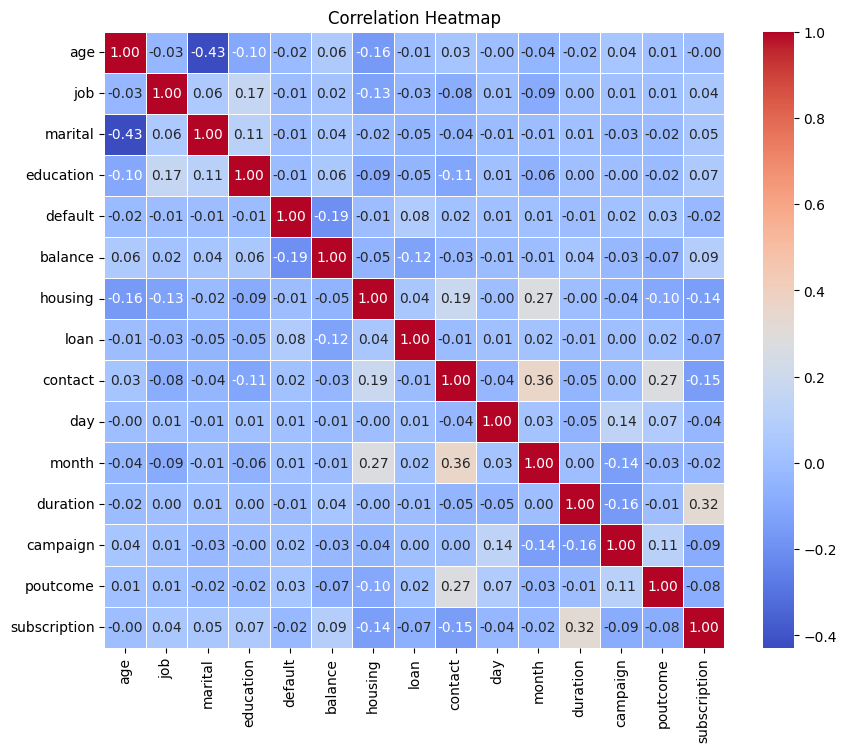

In [34]:
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**observations**

Diagonal Elements

    The diagonal elements represent the correlation of each variable with
    
    itself, which is always 1.0. That's why they are all dark red in the heatmap.


Correlation Coefficient

    The numbers inside the cells represent the correlation coefficient between two variables. The closer the value is to:

    1: Strong positive correlation (if one increases, the other increases).

    0: No correlation (variables are independent of each other).

    -1: Strong negative correlation (if one increases, the other decreases)

 Color Scheme:
   
    red shades indicate positive correlations. The deeper the red, the stronger the positive correlation.

    Blue shades indicate negative correlations. The deeper the blue, the stronger the negative correlation.


    light color indicate weak or near-zero correlations, meaning these variables have little to no linear relationship.


insights



poutcome vs. pdays:

    Correlation value of 0.86, which indicates a strong positive correlation
    
    This implies that as pdays (the number of days since the client was last
    
    contacted) increases, the outcome of the previous marketing campaign (poutcome) is also likely to have a positive outcome.


 previous vs. poutcome:

    Correlation value of 0.49, which is a moderate positive correlation.

    The more contacts the client had before this campaign (previous),

    the more likely the outcome of the campaign (poutcome) will be positive.


contact vs. loan

    Correlation value of 0.36, which suggests that there's a moderate positive
    
    correlation between the type of communication (contact) and whether the

    client has a loan.
    
    This could mean that the way clients are contacted
    influences their likelihood of having a loan.

duration vs. balance

    A small positive correlation (0.08).
    
    This suggests that there is only a weak relationship between the balance in
    
    the bank and the duration of a call with the client.


 Low Correlation with Subscription

    Most of the variables seem to have very low correlation values with subscription

**pair** **plot**

 ***understanding*** ***the*** ***relationship*** ***between*** ***different*** ***variables***

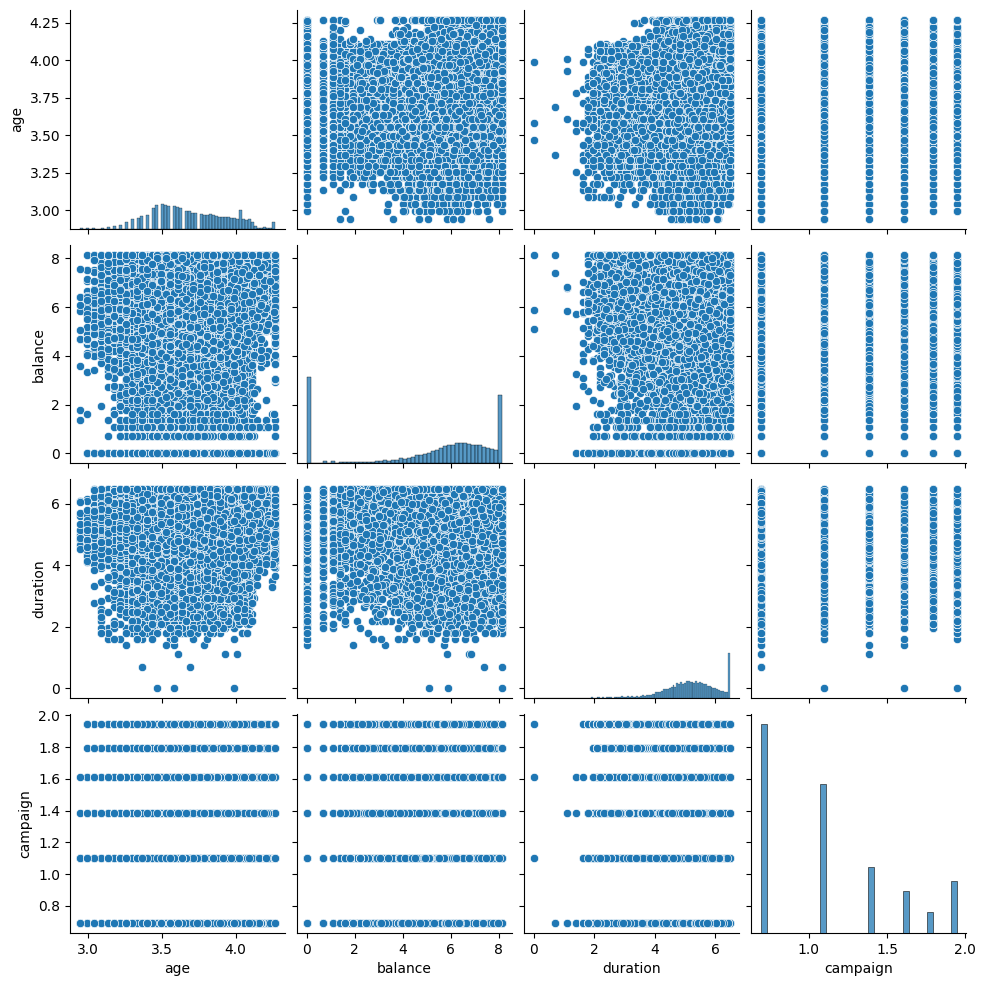

In [35]:
# Select only numerical columns for the pair plot
numerical_cols = ['age', 'balance', 'duration', 'campaign']

# Plot
sns.pairplot(df[numerical_cols])
plt.show()


**Age**

    majority of clients are in the range of 20 to 60, with a spike around the middle-aged group.

**Balance**

    The distribution is heavily skewed toward lower balances, with a few
    
    clients having very high balances, which indicates the presence of outliers.


**Day**

    The day variable (which could refer to the day of the month) is uniformly
    
    distributed, meaning calls were likely made equally across different days.


**Duration**

    
    
    Most calls have a short duration, with a few outliers reaching very high durations


**Campaign**

    Most customers have been contacted only a few times, with the majority

    receiving fewer than 10 calls.




**Split** **Data** **into** **Training** **and** **Testing** **Sets**

In [36]:

x = df.drop('subscription', axis=1)
y = df['subscription']

**Feature** **Selection**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE



**RandomForestClassifier**

In [38]:


model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=5)
x_rfe = rfe.fit_transform(x, y)

# Get the selected features
selected_features = x.columns[rfe.support_]                                                         # to find which features supports most
print("Selected Features:", selected_features)

# Get the ranking of features
feature_ranking = rfe.ranking_                                                                      # to find the rankings of the features
print("Feature Ranking:", feature_ranking)

# Get the importance scores of features
model.fit(x, y)
feature_importances = model.feature_importances_                                                    # to find which features are important by score
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

Selected Features: Index(['age', 'balance', 'day', 'month', 'duration'], dtype='object')
Feature Ranking: [ 1  3  7  5 10  1  6  9  8  1  1  1  4  2]
Feature Importances:
       Feature  Importance
11   duration    0.271112
0         age    0.119889
5     balance    0.113849
9         day    0.106936
10      month    0.099129
13   poutcome    0.067788
1         job    0.058145
12   campaign    0.042417
3   education    0.032861
2     marital    0.025555
6     housing    0.025019
8     contact    0.023871
7        loan    0.011253
4     default    0.002175


**barplot** **with** **seaborn** **to** **visualize** **the** **feature** **importance**


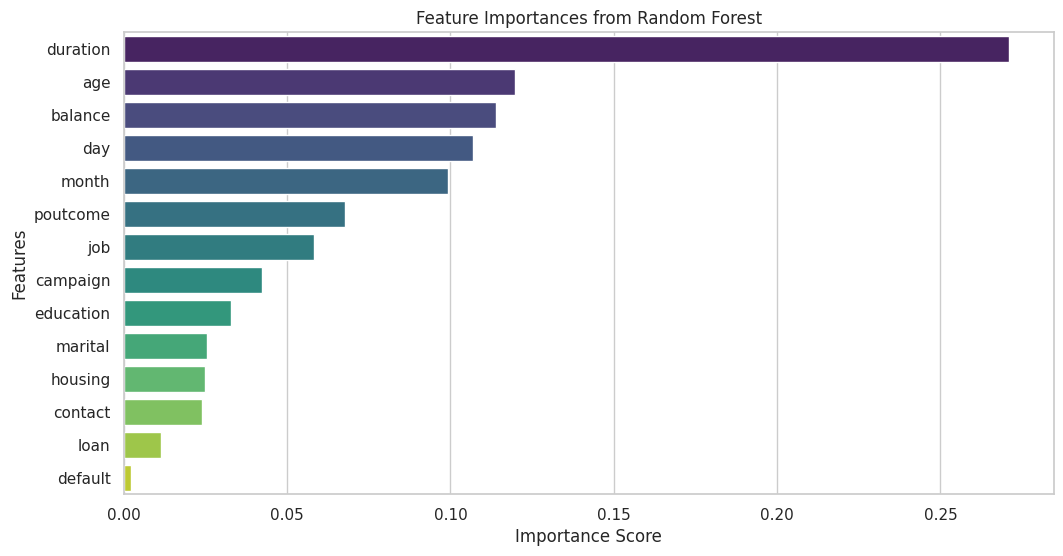

In [39]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

**Feature** **Scaling**

In [40]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import RobustScaler


robust_scaler = RobustScaler()

numerical_cols = ['age', 'duration', 'campaign']

df_scaled = df.copy()

                                                                           # Apply RobustScaler only to the numerical columns
df_scaled[numerical_cols] = robust_scaler.fit_transform(df[numerical_cols])

print(df_scaled)


            age  job  marital  education  default   balance  housing  loan  \
0      1.063477    4        1          2        0  7.670429        1     0   
1      0.322287    9        2          1        0  3.401197        1     0   
2     -0.444697    2        1          1        0  1.098612        1     1   
3      0.498883    1        1          3        0  7.317876        1     0   
4     -0.444697   11        2          3        0  0.693147        0     0   
...         ...  ...      ...        ...      ...       ...      ...   ...   
45206  0.717902    9        1          2        0  6.716595        0     0   
45207  1.589280    5        0          0        0  7.455877        0     0   
45208  1.589280    5        1          1        0  8.149891        0     0   
45209  1.016702    1        1          1        0  6.505784        0     0   
45210 -0.140353    2        1          1        0  7.996990        0     0   

       contact       day  month  duration  campaign  poutcome  

**bulid** **and** **evaluation** **of** **model** **

In [42]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


In [43]:

# classification models

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost Classifier': xgb.XGBClassifier()
}


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


                                               # Initialize a dictionary to store results
results = {}

                                               # Initialize a dictionary to store classification reports
classification_reports = {}

                                                # Train and evaluate models
for model_name, model in models.items():
                                                  # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate metrics and store in results
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

    # Store the classification report
    classification_reports[model_name] = classification_report(y_test, y_pred, output_dict=False)

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Display the results
print("Model Performance:")
print(results_df)

# Print the classification reports for each model
print("\nClassification Reports:")
for model_name, report in classification_reports.items():
    print(f"\n{model_name} Classification Report:")
    print(report)

Model Performance:
                              Accuracy  Precision    Recall  F1 Score
Logistic Regression           0.882340   0.855058  0.882340  0.858544
Decision Tree Classifier      0.870729   0.870167  0.870729  0.870446
Random Forest Classifier      0.898927   0.885739  0.898927  0.888504
Gradient Boosting Classifier  0.900586   0.887232  0.900586  0.889205
XGBoost Classifier            0.904456   0.895923  0.904456  0.898712

Classification Reports:

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.53      0.20      0.30      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.59      0.62      9043
weighted avg       0.86      0.88      0.86      9043


Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
       

 **confusion** **matrix** **and** **ROC** **curve** **of** **the** **each** **models**

<Figure size 800x600 with 0 Axes>

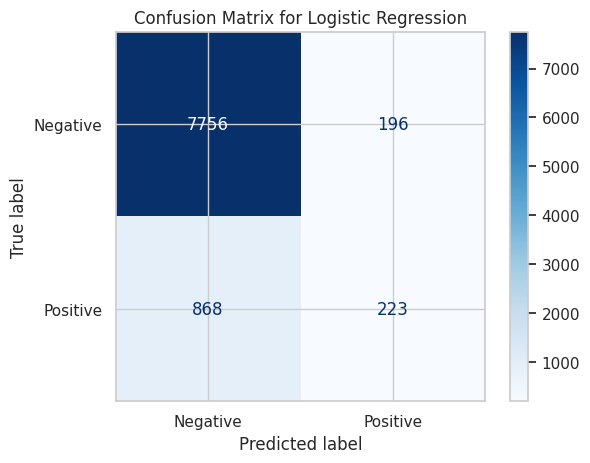

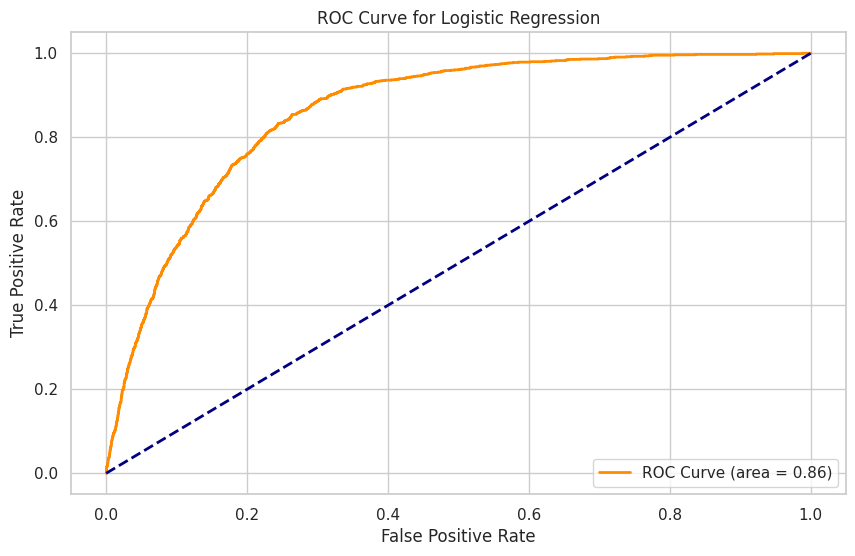

<Figure size 800x600 with 0 Axes>

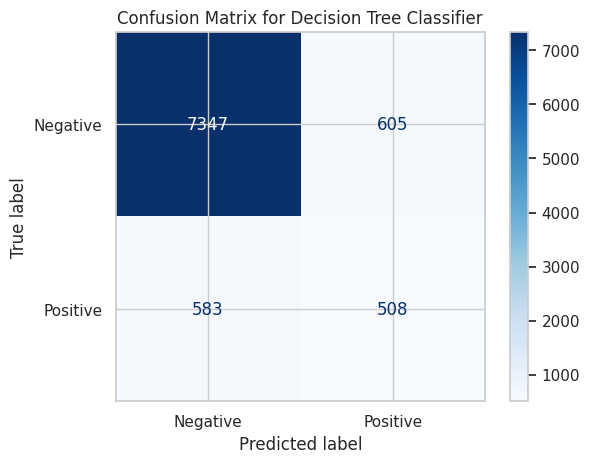

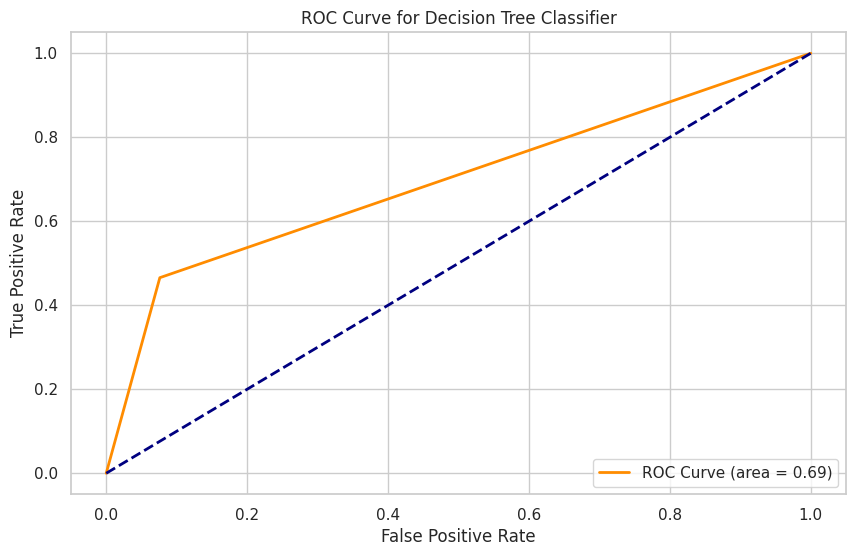

<Figure size 800x600 with 0 Axes>

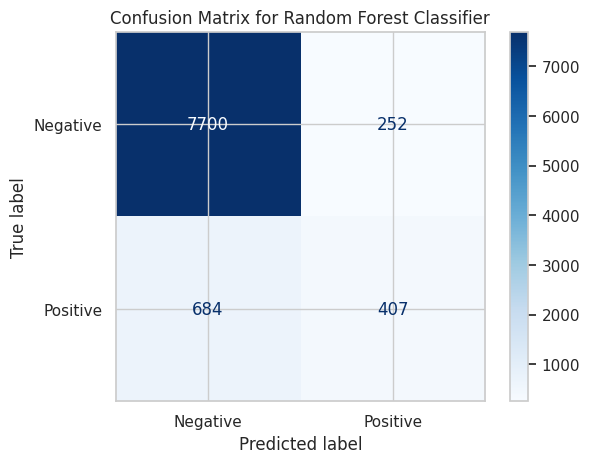

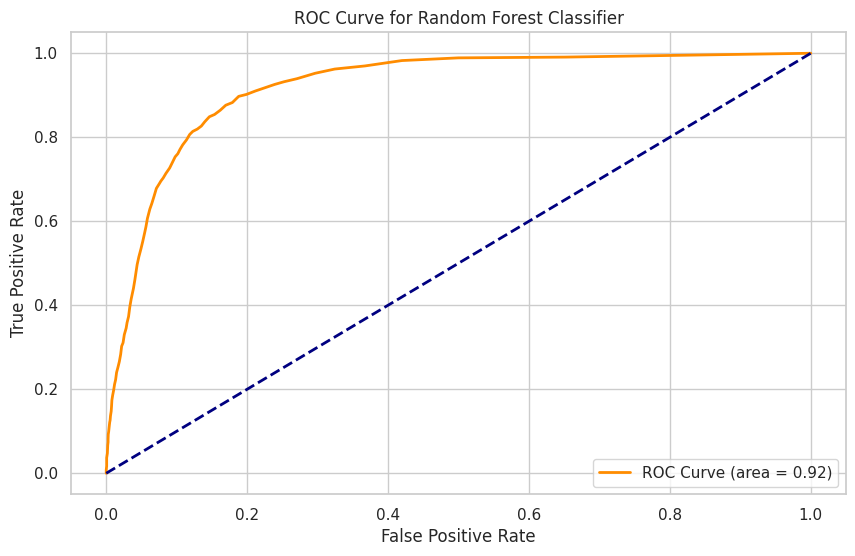

<Figure size 800x600 with 0 Axes>

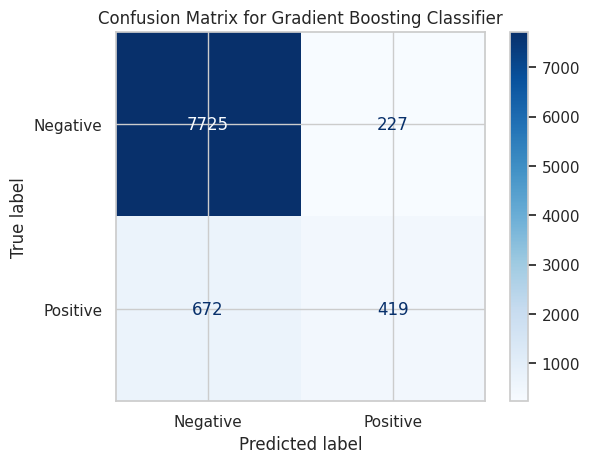

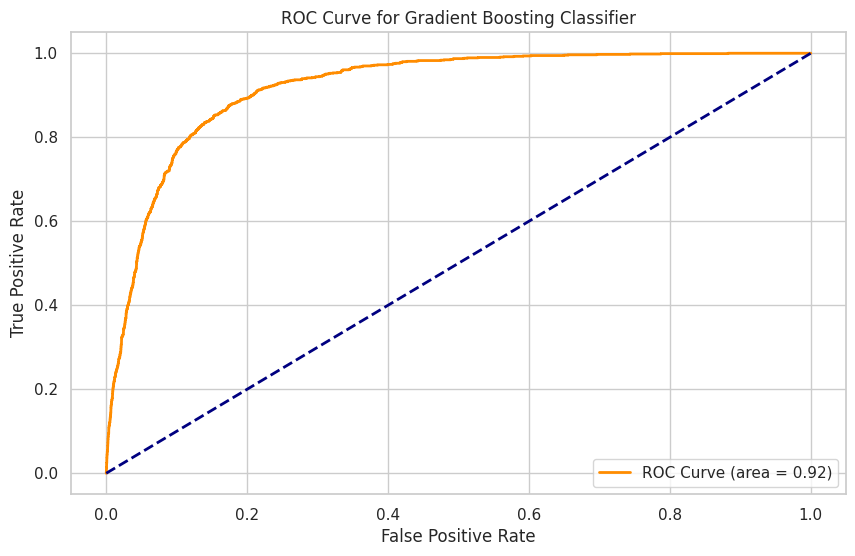

<Figure size 800x600 with 0 Axes>

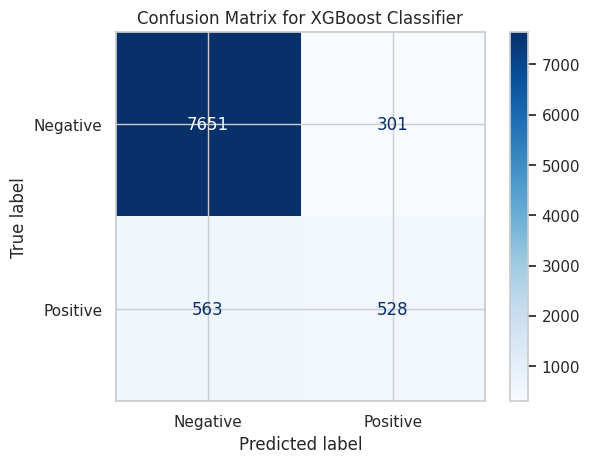

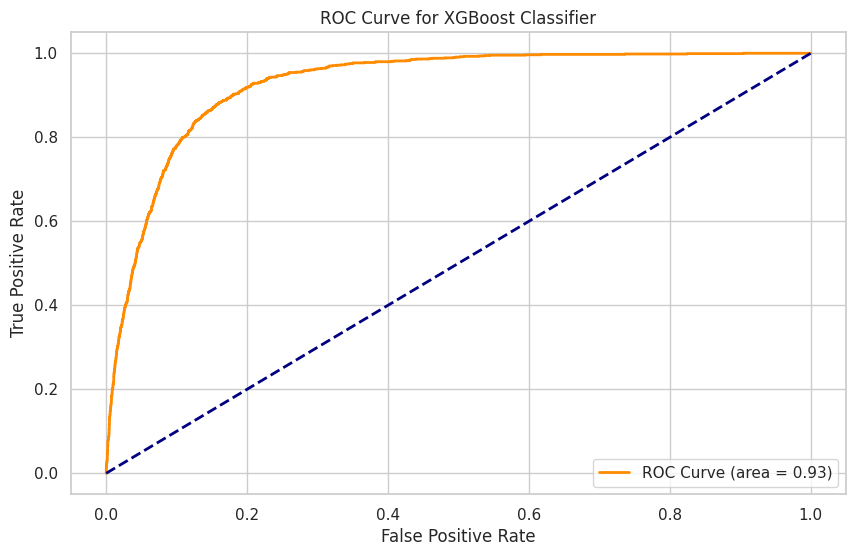

In [45]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay


# Loop through models to draw confusion matrix and ROC curve
for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(x_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


 **Confusion** **Matrix** **


True Positives (TP): The number of correct positive predictions. High TP indicates that the model is good at detecting positive cases.

True Negatives (TN): The number of correct negative predictions. High TN means the model correctly identifies negative cases.

False Positives (FP): The number of incorrect positive predictions. High FP can indicate that the model is incorrectly flagging negative cases as positive.

False Negatives (FN): The number of incorrect negative predictions. High FN indicates that positive cases are being missed, which can be a major issue if false negatives are costly (e.g., in medical diagnoses).





**ROC** **Curve** **Insights**



True Positive Rate (TPR) or Recall: Plotted on the y-axis. It shows how effectively the model identifies positive cases. Higher TPR is better.
False Positive Rate (FPR): Plotted on the x-axis. It indicates how often the model incorrectly identifies negative cases as positive. Lower FPR is better.
AUC (Area Under the Curve): A measure of the model's ability to discriminate between positive and negative classes. An AUC:

Close to 1: Excellent model performance.
Around 0.5: The model is no better than random guessing.

Less than 0.5: Indicates that the model is performing worse than random chance



**model** **performance** **comparison**

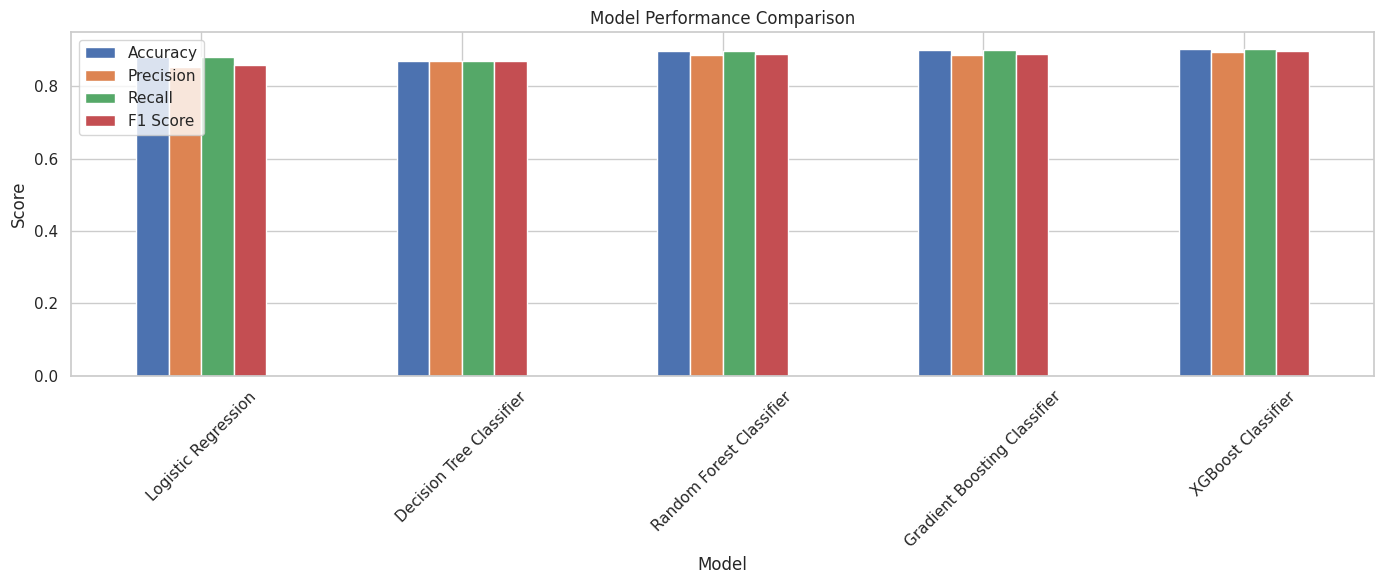

In [46]:


# Assuming `results_df` contains the performance metrics for each model
results_df.plot(kind='bar', figsize=(14, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


All models demonstrate relatively consistent scores across all five metrics.

**Find** **the** **model** **with** **the** **highest** **average** **score** **across** **metrics**

In [47]:

results_df['Average'] = results_df.mean(axis=1)
best_model = results_df['Average'].idxmax()

# Print the best model and its metrics
print(f"Best Model: {best_model}")
print(results_df.loc[best_model])


Best Model: XGBoost Classifier
Accuracy     0.904456
Precision    0.895923
Recall       0.904456
F1 Score     0.898712
Average      0.900887
Name: XGBoost Classifier, dtype: float64


**Define** **hyperparameter** **tuning** **space** **in** **best** **model** **like** **xgboost** **classifier**

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 300],       # Number of trees
    'max_depth': [3, 5, 7, 10],                # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],              # Fraction of samples used for training
    'colsample_bytree': [0.6, 0.8, 1.0],       # Fraction of features used for training
    'gamma': [0, 1, 5],                        # Minimum loss reduction to make a split
    'reg_alpha': [0, 0.1, 1],                  # L1 regularization term
    'reg_lambda': [1, 2, 5],                   # L2 regularization term
}

# Create the XGBoost Classifier instance
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,                     # Number of parameter settings to sample
    cv=3,                          # 3-fold cross-validation
    scoring='accuracy',            # Optimize for accuracy
    n_jobs=-1,                     # Use all available cores
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

# Retrieve the best parameters and corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("\nBest Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_score)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate and display test set metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best Parameters: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best Cross-Validated Accuracy: 0.9034229152842292

Test Set Accuracy: 0.905783478933982

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.64      0.49      0.56      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



 **Display** **the** **evaluation** **results**

In [49]:

evaluation_results = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average="weighted"),
        recall_score(y_test, y_pred, average="weighted"),
        f1_score(y_test, y_pred, average="weighted"),
    ]
}

# Convert results to a DataFrame
results_df = pd.DataFrame(evaluation_results)

# Display the metrics as a table
print("\nEvaluation Metrics:")
print(results_df)


Evaluation Metrics:
      Metric     Value
0   Accuracy  0.905783
1  Precision  0.897642
2     Recall  0.905783
3   F1 Score  0.900318


 **Save** **the** **Model**

In [60]:
import pickle

# Assuming 'best_model' is the trained model you want to save
model_filename = 'best_model.pkl'

# Save the model to a file
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"Model saved as {model_filename}")


Model saved as best_model.pkl


**Load** **the**  **model**

In [61]:
import pickle

# Load the model from the file

with open('best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


print("Model loaded successfully!")


Model loaded successfully!


**Test** **with** **Unseen** **Data**

**creating** **unseen** **data**

In [62]:
import pandas as pd

# Create the unseen data
unseen_data = pd.DataFrame({
    'age': [56, 69, 46, 32, 60],
    'job': ['unemployed', 'management', 'services', 'unemployed', 'unemployed'],
    'marital': ['married', 'married', 'married', 'single', 'single'],
    'education': ['tertiary', 'tertiary', 'tertiary', 'secondary', 'unknown'],
    'default': ['no', 'yes', 'no', 'yes', 'no'],
    'balance': [1500, 2000, 2500, 1000, 3500],
    'housing': ['yes', 'yes', 'yes', 'yes', 'yes'],
    'loan': ['no', 'no', 'no', 'yes', 'no'],
    'contact': ['telephone', 'cellular', 'telephone', 'cellular', 'telephone'],
    'day': [3, 15, 9, 23, 4],
    'month': [0, 1, 2, 3, 4],
    'duration': [452, 612, 385, 732, 529],
    'campaign': [1, 2, 3, 1, 2],
    'poutcome': [0, 1, 2, 3, 1]
})

# Save to a CSV file if needed
unseen_data.to_csv('unseen_data.csv', index=False)
print("Unseen data has been saved to 'unseen_data.csv'.")

Unseen data has been saved to 'unseen_data.csv'.


 **Display** **the** **unseen** **data**

In [53]:

unseen_data.head()




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,56,unemployed,married,tertiary,no,1500,yes,no,telephone,3,0,452,1,0
1,69,management,married,tertiary,yes,2000,yes,no,cellular,15,1,612,2,1
2,46,services,married,tertiary,no,2500,yes,no,telephone,9,2,385,3,2
3,32,unemployed,single,secondary,yes,1000,yes,yes,cellular,23,3,732,1,3
4,60,unemployed,single,unknown,no,3500,yes,no,telephone,4,4,529,2,1


**check** **unseen** **data** **null** **value**

In [54]:
unseen_data.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [55]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5 non-null      int64 
 1   job        5 non-null      object
 2   marital    5 non-null      object
 3   education  5 non-null      object
 4   default    5 non-null      object
 5   balance    5 non-null      int64 
 6   housing    5 non-null      object
 7   loan       5 non-null      object
 8   contact    5 non-null      object
 9   day        5 non-null      int64 
 10  month      5 non-null      int64 
 11  duration   5 non-null      int64 
 12  campaign   5 non-null      int64 
 13  poutcome   5 non-null      int64 
dtypes: int64(7), object(7)
memory usage: 688.0+ bytes


**Encording** **unseen** **data** **using** **LabelEncoder**

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',]

# Encode categorical columns
for col in categorical_cols:
    unseen_data[col] = label_encoder.fit_transform(unseen_data[col])

# Display the encoded unseen data
print(unseen_data)


   age  job  marital  education  default  balance  housing  loan  contact  \
0   56    2        0          1        0     1500        0     0        1   
1   69    0        0          1        1     2000        0     0        0   
2   46    1        0          1        0     2500        0     0        1   
3   32    2        1          0        1     1000        0     1        0   
4   60    2        1          2        0     3500        0     0        1   

   day  month  duration  campaign  poutcome  
0    3      0       452         1         0  
1   15      1       612         2         1  
2    9      2       385         3         2  
3   23      3       732         1         3  
4    4      4       529         2         1  


**scale** **the** **unseen** **data** **using** **robustScaler**

In [57]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

                       # Apply RobustScaler to the relevant columns
unseen_data[numerical_cols] = robust_scaler.fit_transform(unseen_data[numerical_cols])

print(unseen_data)

        age  job  marital  education  default  balance  housing  loan  \
0  0.000000    2        0          1        0     1500        0     0   
1  0.928571    0        0          1        1     2000        0     0   
2 -0.714286    1        0          1        0     2500        0     0   
3 -1.714286    2        1          0        1     1000        0     1   
4  0.285714    2        1          2        0     3500        0     0   

   contact  day  month  duration  campaign  poutcome  
0        1    3      0  -0.48125      -1.0         0  
1        0   15      1   0.51875       0.0         1  
2        1    9      2  -0.90000       1.0         2  
3        0   23      3   1.26875      -1.0         3  
4        1    4      4   0.00000       0.0         1  


**Make** **predictions** **using** **the** **loaded** **model**

In [58]:
                                                                                   # Ensure unseen_data has all the required columns
expected_columns = ['age', 'job', 'marital', 'education', 'default', 'balance',
                    'housing', 'loan', 'contact', 'day', 'month', 'duration',
                    'campaign', 'poutcome']

                                                                                       # Generate predictions using the trained model
predictions = best_model.predict(unseen_data)

                                                                                           # Insert predictions into the unseen data
unseen_data['subscription_prediction'] = predictions

                                                                                           # Save the updated DataFrame with predictions
unseen_data.to_csv('unseen_data_with_predictions.csv', index=False)


print("Predictions have been made and saved to 'unseen_data_with_predictions.csv'.")
print(unseen_data[['age', 'job', 'marital', 'education', 'subscription_prediction']])


Predictions have been made and saved to 'unseen_data_with_predictions.csv'.
        age  job  marital  education  subscription_prediction
0  0.000000    2        0          1                        0
1  0.928571    0        0          1                        0
2 -0.714286    1        0          1                        0
3 -1.714286    2        1          0                        0
4  0.285714    2        1          2                        0


In [59]:
import joblib
joblib.dump(best_model, 'final_model.pkl')


['final_model.pkl']

**Conclusion**

The program successfully predicts whether customers in the unseen data will subscribe to a term deposit based on their demographic and behavioral attributes. The predictions are saved in a CSV file, making the results easily accessible for further analysis .

This approach is effective in situations where new data comes in periodically, and predictions need to be made without retraining the model every time. The entire process—data preprocessing, scaling, prediction, and saving results—is automated, streamlining decision-making processes based on model outputs.